# Supplementary Figure 1

In [1]:
import polars as pl
import seaborn as sns
import polars.selectors as cs
import matplotlib.pyplot as plt

In [5]:
cd = "/data/cephfs-2/unmirrored/groups/kircher/MPRA/CaptureCMPRA/results/manuscript_figures/supp_figure1/"
seq_lengths = pl.read_csv(cd + "filtered_interactions_sequence_lengths.tsv", has_header=False)
prom_seq_lengths = pl.read_csv(cd + "promoter_lengths.tsv", new_columns=["Sequence length"]).with_columns(type=pl.lit("promoter"))
non_prom_seq_lengths = pl.read_csv(cd + "non_promoter_lengths.tsv", new_columns=["Sequence length"]).with_columns(type=pl.lit("non-promoter"))
grouped_lengths = pl.concat([prom_seq_lengths, non_prom_seq_lengths])

In [6]:
def print_medmean(df):
	print("median: ", df.median().to_numpy()[0][0])
	print("mean: ", df.mean().to_numpy()[0][0])

In [7]:
print_medmean(prom_seq_lengths)
print_medmean(non_prom_seq_lengths)

median:  553.0
mean:  588.1864337837421
median:  254.0
mean:  330.5092143453504


In [12]:
print(prom_seq_lengths.min().to_numpy()[0][0], prom_seq_lengths.max().to_numpy()[0][0])
print(non_prom_seq_lengths.min().to_numpy()[0][0], non_prom_seq_lengths.max().to_numpy()[0][0])

30 3023
30 3089


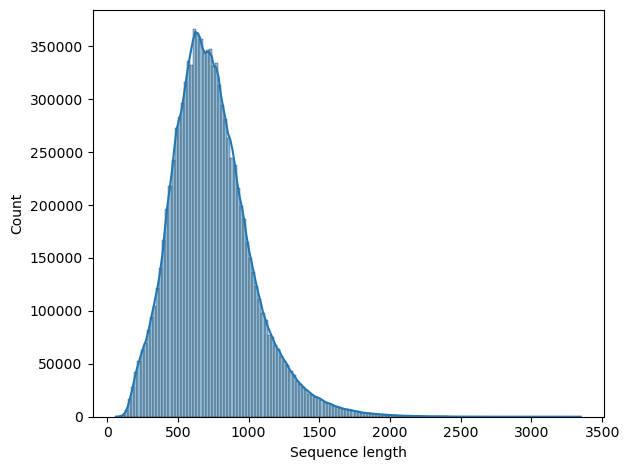

In [3]:
sns.histplot(pl.read_csv("filtered_interactions_sequence_lengths.tsv"), legend=False, bins=150, kde=True)
plt.xlabel("Sequence length")
plt.tight_layout()
plt.savefig("sequence_lengths_pre_binning.pdf", format="pdf")


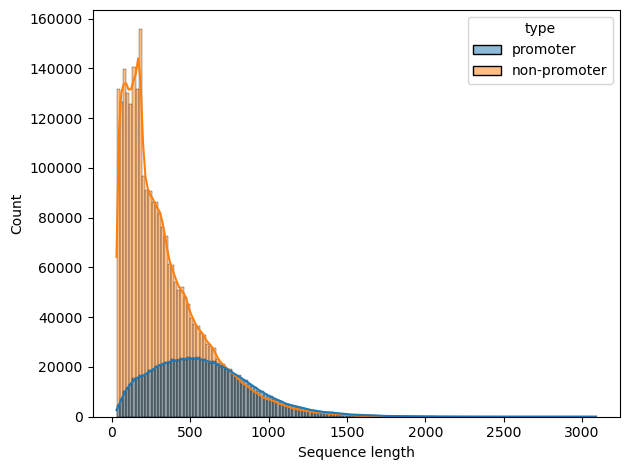

In [3]:
sns.histplot(grouped_lengths.to_pandas(), x="Sequence length",bins=150, kde=True, hue="type")
plt.tight_layout()
plt.savefig("grouped_sequence_lengths_pre_binning.pdf", format="pdf")

In [26]:
interaction_labels = pl.read_csv("summarized_interactions_rmap.txt", new_columns=["Interaction label", "count"], separator="\t")
interaction_counts = interaction_labels.group_by("Interaction label").agg(
	pl.sum("count").alias("Number of interactions")).sort("Number of interactions")
total_count = interaction_counts.select(pl.sum("Number of interactions")).to_numpy()[0][0]

In [50]:
print(interaction_counts.select(pl.col("Number of interactions")).to_numpy().flatten().tolist())

[186, 800, 34061, 58586, 99012, 206231, 872304, 932984, 1640535, 6803594]


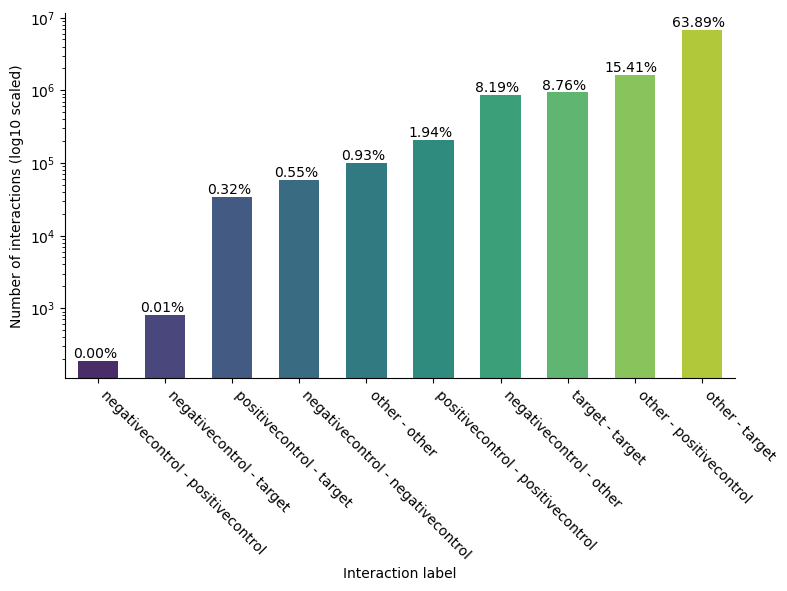

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=-45, ha='left')
plt.yscale('log')
barplot = sns.barplot(data=interaction_counts.to_pandas(), x="Interaction label", y="Number of interactions", width=0.6, palette="viridis")

# # Annotate each bar with the height
# for p in barplot.patches:
#     height = p.get_height()
#     barplot.annotate(f'{int(height)}', 
#                      (p.get_x() + p.get_width() / 2., height), 
#                      ha='center', va='center', 
#                      xytext=(0, 10), 
#                      textcoords='offset points')
total = total_count
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() * 1.1  # Adjust this factor to move the text higher
    ax.annotate(percentage, (x, y), ha='center')

plt.ylabel("Number of interactions (log10 scaled)")
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("interaction_percentages.pdf", format="pdf")

In [10]:
counts_per_bait = pl.read_csv("interactions_per_bait.tsv", new_columns=["Bait", "Number of interactions", "label"], separator="\t")
significant_counts_per_bait = pl.read_csv("significant_interactions_per_bait.tsv", new_columns=["Bait", "Number of significant interactions", "label"], separator="\t")

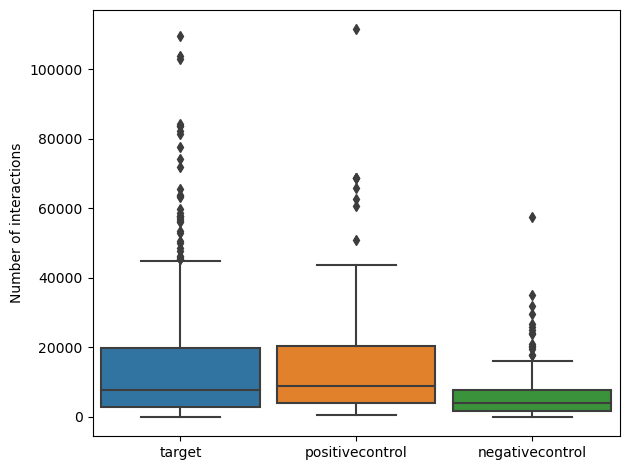

In [5]:
sns.boxplot(counts_per_bait.to_pandas(), x="label", y="Number of interactions", width=0.9)#, cut=0)
plt.xlabel("")
plt.tight_layout()
plt.savefig("interaction_counts_pre_binning.pdf", format="pdf")

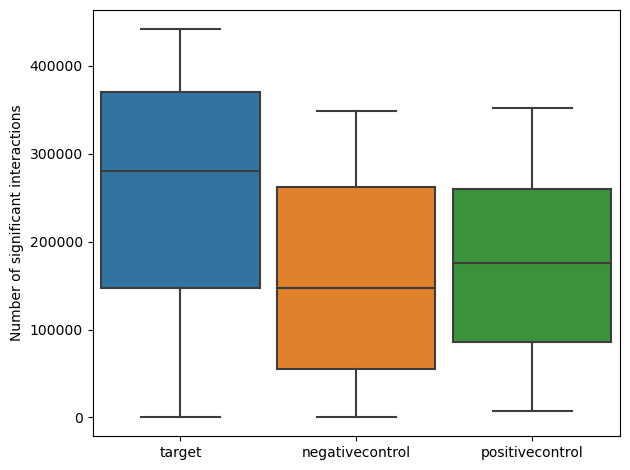

In [11]:
sns.boxplot(significant_counts_per_bait.to_pandas(), x="label", y="Number of significant interactions", width=0.9)#, cut=0)
plt.xlabel("")
plt.tight_layout()
plt.savefig("significant_interaction_counts_pre_binning.pdf", format="pdf")

In [60]:
counts_per_bait.min()

Bait,Number of interactions,label
i64,i64,str
19121,16,"""negativecontro…"


In [2]:
labels = pl.read_csv('/data/humangen_kircherlab/MPRA/CaptureCMPRA/results/manuscript_figures/enrichment_plot/baits_with_labels.tsv', separator='\t')

In [3]:
cHic = pl.read_csv('/data/humangen_kircherlab/MPRA/CaptureCMPRA/mpra_capture_flow/results/CMPRA5/chicago/data/CMPRA5_5000.filtered_le20mb.ibed',
				   separator="\t")

In [ ]:
cHic = cHic.join(labels, left_on="bait_name", right_on="bait").with_columns(pl.n_unique("bait_name", "othterEnd_start").over("").alias("number of interactions"))

In [ ]:
sns.violinplot(cHic.to_pandas(), x="label", y="number of interactions", width=0.9)